# MVMDS vs PCA

MVMDS is a useful multiview dimensionaltiy reduction algorithm that allows the user to perform Multidimensional Scaling on multiple views at the same time. In this notebook, we see how MVMDS performs in clustering randomly generated data and compare this to single-view classical multidimensional scaling which is equivalent to Principal Component Analysis (PCA).

### Imports

In [1]:
from mvlearn.datasets import load_UCImultifeature
from mvlearn.embed import MVMDS

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

%matplotlib inline

### Loading Data

Creates a dataset with 5 unique views. Each is represented by blobs distributed that are distributed around 6 random center points with a fixed variance.There are 100 points around each center point. The number of features of these blobs varies and the random states are assigned. Each view shares outcome values ranging from 0-5

In [44]:
p = np.array([100,100,100,100,100,100])

#creates the blobs
j = make_blobs(n_features=12,n_samples=p, cluster_std= 4,random_state= 1)
k = make_blobs(n_features = 27,n_samples = p,cluster_std = 3,random_state=23)
l = make_blobs(n_features = 22,n_samples = p,cluster_std = 5,random_state=35)
m = make_blobs(n_features = 32,n_samples = p,cluster_std = 5,random_state=52)
n = make_blobs(n_features = 15,n_samples = p,cluster_std = 7,random_state=2)


v1 = j[0]
v2 = k[0]
v3 = l[0]
v4 = m[0]
v5 = n[0]

Views = [v1,v2,v3,v4,v5]

In [45]:
# This creates a single-view dataset by concatenating the multiple views as features of the first view (Naive multi-view)

arrays = []

for i in [j,k,l,m,n]:
    df = pd.DataFrame(i[0])
    df['Class'] = i[1]
    df = df.sort_values(by = ['Class'])
    y = np.array(df['Class'])
    df = df.drop(['Class'],axis = 1)
    arrays.append(np.array(df))    
    
Views = arrays

Views_concat = np.hstack((arrays[0],arrays[1],arrays[2],arrays[3],arrays[4]))

### Plot original Data

As you can see. The blobs are not distinguishable in 2-Dimensions

Text(0, 0.5, 'Feature 2')

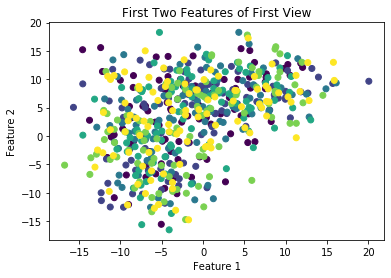

In [46]:
ax = plt.subplot(111)
plt.scatter(v1[:,0],v1[:,1],c = y)
plt.title('First Two Features of First View')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## MVMDS Views Without Noise

Here we will take into account all of the views and perform MVMDS. This dataset does not contain noise and each view performs decently well in predicting the class. Therefore we will expect the common components created by MVMDS to create a strong representation of the data *(Note MVMDS only uses the fit_transform function to properly return the correct components)*

In the cell after, PCA on the concatenated single-view is shown for comparison. It can be seen that MVMDS performs better in this instance. 

*Note: Each color represents a unique number class*


In [47]:
#Fits MVMDS 
mvmds = MVMDS(n_components=2)
fit = mvmds.fit_transform(Views)

#Fits PCA
pca = PCA(n_components=2)
fit2 = pca.fit_transform(Views_concat)

MVMDS has an ARI score of 0.9840270979888018. while PCA has an ARI score of 0.9344335788597602. 
Therefore we can say MVMDS performs better in this instance


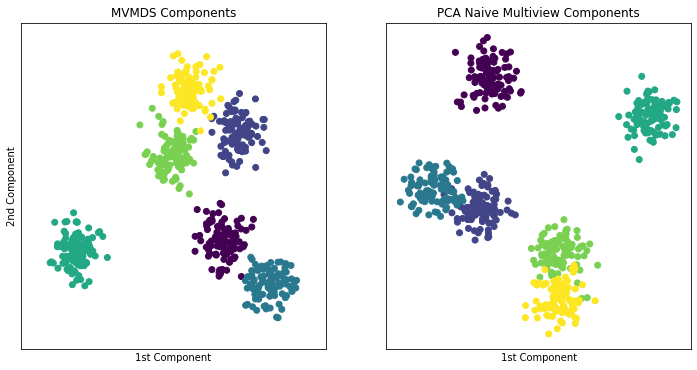

In [48]:
#Fits K-Means to MVMDS for cluster comparison
kmeans = KMeans(n_clusters=6, random_state=0).fit(fit)
labels1 = kmeans.labels_

fig, axes = plt.subplots(1,2, figsize=(12,6))

#Plots MVMDS components
axes[0].scatter(fit[:,0],fit[:,1],c = y)
axes[0].set_title('MVMDS Components')
axes[0].set_xlabel('1st Component')
axes[0].set_ylabel('2nd Component')
axes[0].set_xticks([])
axes[0].set_yticks([])

#Fits K-Means to PCA for cluster comparison
kmeans = KMeans(n_clusters=6, random_state=0).fit(fit2)
labels2 = kmeans.labels_

#Plots PCA components
axes[1].scatter(fit2[:,0],fit2[:,1],c = y)
axes[1].set_title('PCA Naive Multiview Components')
axes[1].set_xlabel('1st Component')
axes[1].set_xticks([])
axes[1].set_yticks([])

#Comparison of ARI scores

score1 = adjusted_rand_score(labels1,y)
score2 = adjusted_rand_score(labels2,y)

print('MVMDS has an ARI score of ' + str(score1) + '. while PCA has an ARI score of ' + str(score2) + 
      '. \nTherefore we can say MVMDS performs better in this instance')

## MVMDS Views With Noise

Here we will create a new variable with multiple views. This variable will contain the same 5 views from before but a 6th view of strictly noise will be added to the dataset. The concatenated single-view dataset will also have this noisy view. We can expect for the common components created by MVMDS to be less representative of the data due to the substantial noise.

As we can see compared to previous cells, the noisy MVMDS components performs worse than the MVMDS components done on views without noise. When compared to PCA on the concatenated single-view with noise, MVMDS performs worse.

*Note: Each color represents a unique number class*


In [41]:
noisy_view = np.random.rand(n[0].shape[0],n[0].shape[1])

Views_Noise = Views
Views_Noise.append(noisy_view)
Views_concat_Noise = np.hstack((Views_concat,noisy_view))

#Fits MVMDS 
mvmds = MVMDS(n_components=2)
fit = mvmds.fit_transform(Views_Noise)

#Fits PCA
pca = PCA(n_components=2)
fit2 = pca.fit_transform(Views_concat_Noise)

MVMDS has an ARI score of 0.9840270979888018. while PCA has an ARI score of 0.9344335788597602. 
Therefore we can say PCA performs better in this instance.


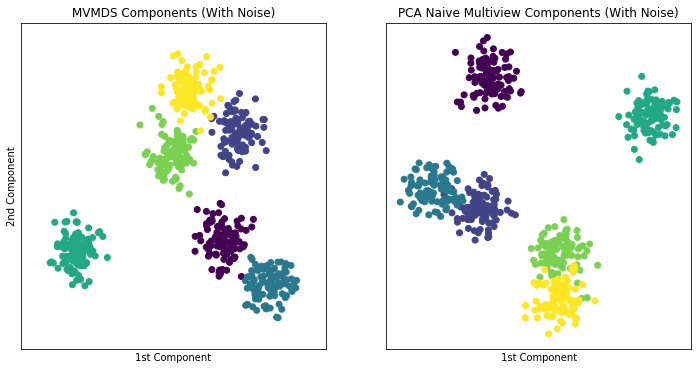

In [49]:
#Fits K-Means to MVMDS for cluster comparison
kmeans = KMeans(n_clusters=6, random_state=0).fit(fit)
labels1_noise = kmeans.labels_

fig, axes = plt.subplots(1,2, figsize=(12,6))

#Plots MVMDS components
axes[0].scatter(fit[:,0],fit[:,1],c = y)
axes[0].set_title('MVMDS Components (With Noise)')
axes[0].set_xlabel('1st Component')
axes[0].set_ylabel('2nd Component')
axes[0].set_xticks([])
axes[0].set_yticks([])

#Fits K-Means to PCA for cluster comparison
kmeans = KMeans(n_clusters=6, random_state=0).fit(fit2)
labels2_noise = kmeans.labels_

#Plots PCA components
axes[1].scatter(fit2[:,0],fit2[:,1],c = y)
axes[1].set_title('PCA Naive Multiview Components (With Noise)')
axes[1].set_xlabel('1st Component')
axes[1].set_xticks([])
axes[1].set_yticks([])

#Comparison of ARI scores

score1_noise = adjusted_rand_score(labels1_noise,y)
score2_noise = adjusted_rand_score(labels2_noise,y)

print('MVMDS has an ARI score of ' + str(score1_noise) + '. while PCA has an ARI score of ' + str(score2_noise) + 
      '. \nTherefore we can say PCA performs better in this instance.')